## Physical implementation of Car Dealership and Parts

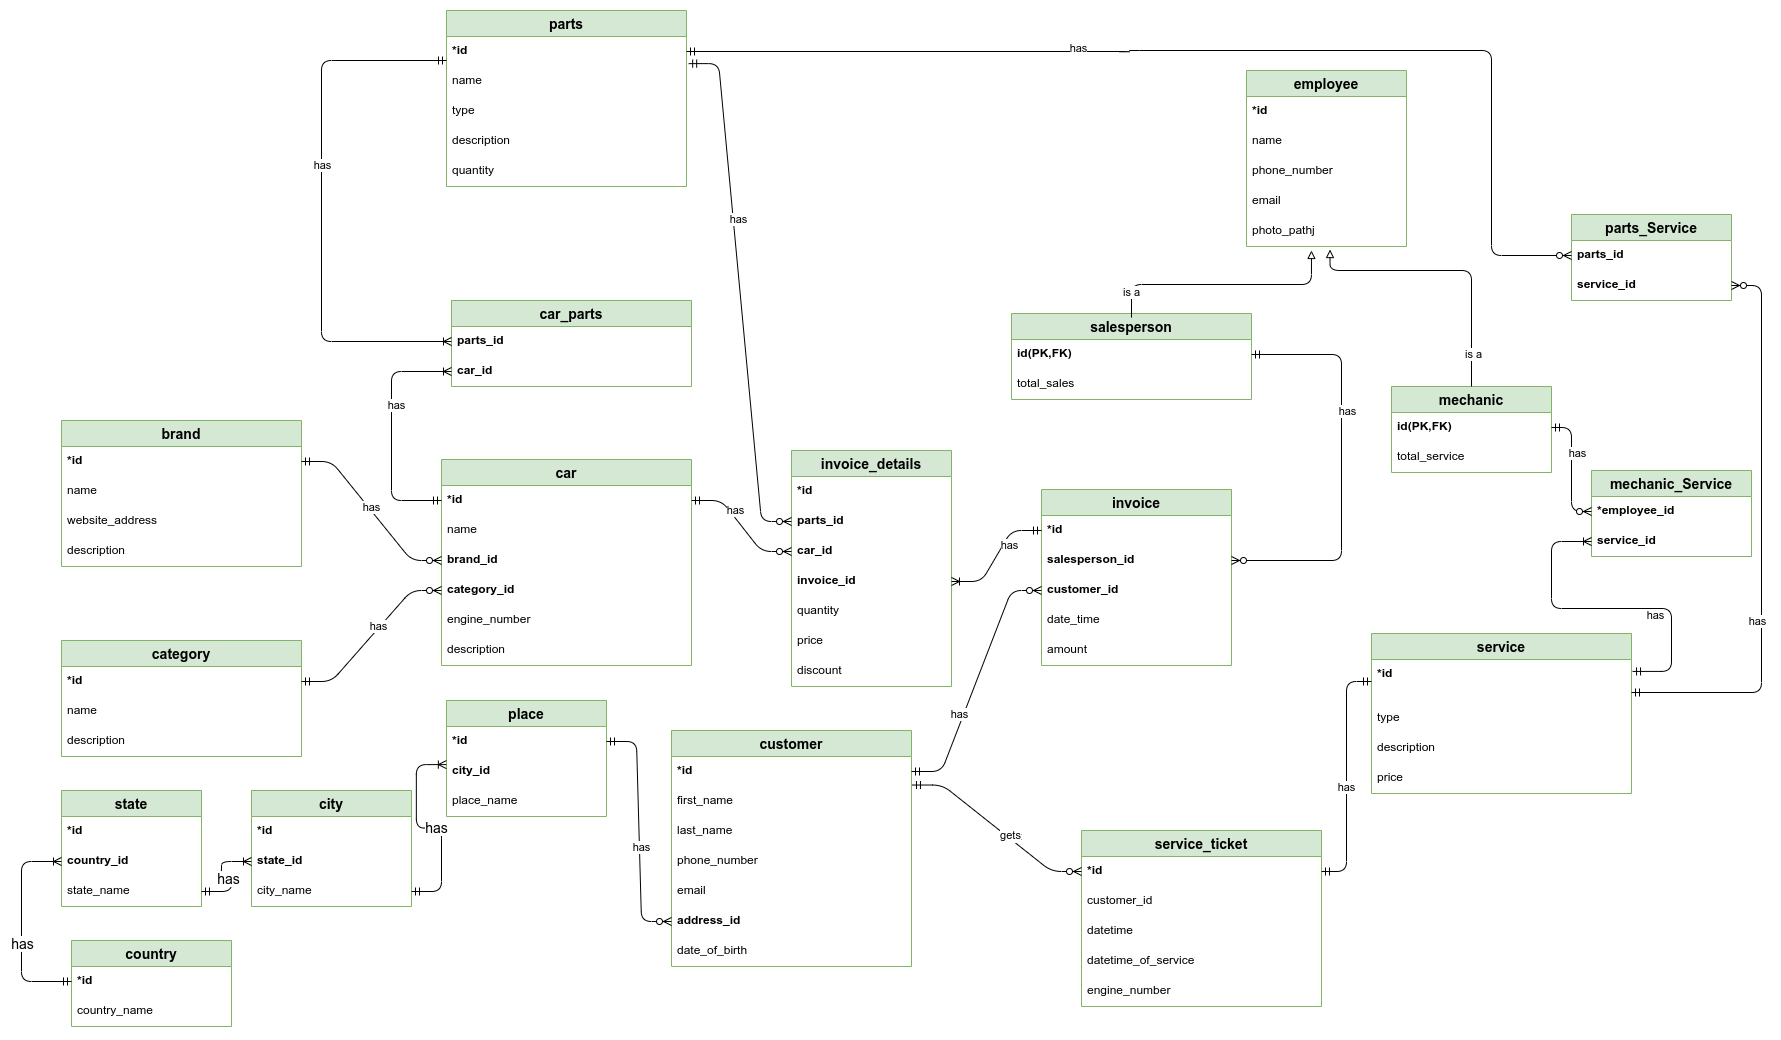

In [3]:
from IPython.display import Image
Image("Car dealership and parts_logical_model.drawio.png")

In [1]:
import psycopg2
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT

In [2]:
def connect():
    connection = psycopg2.connect(user="postgres",
                                  password="admin",
                                  host="localhost",
                                  port="5432",
                                  )
    connection.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT);
    return connection

## Creating Database car_dealership_and_parts

In [3]:
try:
    connection = connect()
    query = "CREATE DATABASE car_dealership_and_parts;"
    
    
    cursor = connection.cursor()
    
    # Executing a SQL query
    cursor.execute(query)
    print("Database sucessfully created")
except (Exception, Error) as error:
    print("Error while connecting to PostgreSQL", error)
finally:
    if (connection):
        cursor.close()
        connection.close()
        print('')
        print("PostgreSQL connection is closed")

Database sucessfully created

PostgreSQL connection is closed


#### Defining connect() method so we can use it laster through out our code

In [4]:
#Defining connect() method so we can we it laster through out our code to connect to the database
def connect():
    connection = psycopg2.connect(user="postgres",
                                  password="admin",
                                  host="localhost",
                                  port="5432",
                                  database="car_dealership_and_parts")
    
    return connection

### Creating tables in the database  "car_dealership_and_parts"

In [6]:
import logging
try:
    connection = connect()
    
    cursor = connection.cursor()
    
    query_1 = '''
    CREATE TABLE brand (
    id SMALLSERIAL PRIMARY KEY,
    name TEXT,
    website_address TEXT,
    description TEXT
    
    )
    '''
    cursor.execute(query_1)
    
    query_2 = '''
    CREATE TABLE category (
    id SMALLSERIAL PRIMARY KEY,
    name TEXT,
    description TEXT
    
    )
    '''
    cursor.execute(query_2)
    
    query_3 = '''
    CREATE TABLE car (
    id SERIAL PRIMARY KEY,
    name TEXT,
    brand_id INTEGER,
    category_id INTEGER,
    engine_number TEXT UNIQUE NOT NULL,
    description TEXT,
    
    CONSTRAINT fk_car_brand
    FOREIGN KEY(brand_id) REFERENCES brand(id),
    
    CONSTRAINT fk_car_category
    FOREIGN KEY(category_id) REFERENCES category(id)
    
    )
    '''
    cursor.execute(query_3)
    
    query_4 = '''
    CREATE TABLE parts (
    id SERIAL PRIMARY KEY,
    name TEXT,
    type TEXT,
    description TEXT,
    quantity INTEGER
    
    )
    '''
    
    cursor.execute(query_4)
    
    query_5 = '''
    CREATE TABLE car_parts (
    parts_id INTEGER,
    car_id INTEGER,
    
    CONSTRAINT fk_car_parts_parts
    FOREIGN KEY(parts_id) REFERENCES parts(id),
    
    CONSTRAINT fk_car_parts_car
    FOREIGN KEY(car_id) REFERENCES car(id),
    
    PRIMARY KEY (parts_id , car_id)
    
    )
    '''
    cursor.execute(query_5)
    query_6 = '''
    CREATE TABLE country (
    id SERIAL PRIMARY KEY,
    country_name TEXT
    )
    '''
    cursor.execute(query_6)
    
    query_7 = '''
    CREATE TABLE state (
    id SERIAL PRIMARY KEY,
    state_name TEXT,
    country_id INTEGER,
    
    CONSTRAINT fk_state_country
    FOREIGN KEY(country_id) REFERENCES country(id)
    )
    '''
    cursor.execute(query_7)
    
    query_8 = '''
    CREATE TABLE city (
    id SERIAL PRIMARY KEY,
    city_name TEXT,
    state_id INTEGER,
    
    CONSTRAINT fk_city_state
    FOREIGN KEY(state_id) REFERENCES state(id)
    )
    '''
    cursor.execute(query_8)
    
    query_9 = '''
    CREATE TABLE place (
    id SERIAL PRIMARY KEY,
    place_name TEXT,
    city_id INTEGER,
    
    CONSTRAINT fk_street_city
    FOREIGN KEY(city_id) REFERENCES city(id)
    )
    '''
    cursor.execute(query_9)

    
    query_10 = '''
    CREATE TABLE customer (
    id SERIAL PRIMARY KEY,
    phone_number TEXT UNIQUE NOT NULL,
    email TEXT UNIQUE NOT NULL,
    address_id INTEGER ,
    first_name TEXT,
    last_name TEXT,
    date_of_birth DATE,
    
    CONSTRAINT fk_customer_place
    FOREIGN KEY(address_id) REFERENCES place(id)
    
    )
    '''
    cursor.execute(query_10)
    
    
    
    query_11 = '''
    CREATE TABLE employee (
    id SMALLSERIAL PRIMARY KEY,
    name TEXT,
    phone_number TEXT NOT NULL UNIQUE,
    email TEXT NOT NULL UNIQUE,
    photo_path TEXT
    )
    '''
    
    cursor.execute(query_11)
    
    query_12 = '''
    CREATE TABLE salesperson (
    id SMALLINT PRIMARY KEY,
    total_sales INTEGER,
    
    CONSTRAINT fk_salesperson_employee
    FOREIGN KEY(id) REFERENCES employee(id)
    
    
    )
    '''
    cursor.execute(query_12)
    
    query_13 = '''
    CREATE TABLE mechanic (
    id SMALLINT PRIMARY KEY,
    total_service INTEGER,
    
    CONSTRAINT fk_mechanic_employee
    FOREIGN KEY(id) REFERENCES employee(id)
    
    
    )
    '''
    cursor.execute(query_13)
    
    query_14 = '''
    CREATE TABLE service_ticket (
    id SERIAL PRIMARY KEY,
    customer_id INTEGER,
    datetime TIMESTAMP,
    datetime_of_service TIMESTAMP,
    engine_number TEXT NOT NULL

    )
    '''
    cursor.execute(query_14)
    
    query_15 = '''
    CREATE TABLE service (
    id SERIAL PRIMARY KEY,
    type TEXT,
    description TEXT
    
    )
    '''
    cursor.execute(query_15)
    
    
    query_16 = '''
    CREATE TABLE parts_service (
    parts_id INTEGER,
    service_id INTEGER,
    
    CONSTRAINT fk_parts_service_parts
    FOREIGN KEY(parts_id) REFERENCES parts(id),
    
    CONSTRAINT fk_parts_service_service
    FOREIGN KEY(service_id) REFERENCES service(id)
    
    )
    '''
    cursor.execute(query_16)
    
    query_17 = '''
    CREATE TABLE mechanic_service (
    employee_id INTEGER,
    service_id INTEGER,
    
    CONSTRAINT fk_mechanic_service_mechanic
    FOREIGN KEY(employee_id) REFERENCES mechanic(id),
    
    CONSTRAINT fk_mechanic_service_service
    FOREIGN KEY(service_id) REFERENCES service(id)
    
    )
    '''
    
    cursor.execute(query_17)
    
    query_18 = '''
    CREATE TABLE invoice (
    id SERIAL PRIMARY KEY,
    salesperson_id INTEGER,
    customer_id INTEGER,
    date_time TIMESTAMP,
    amount MONEY,
    
    CONSTRAINT fk_invoice_salesperson
    FOREIGN KEY(salesperson_id) REFERENCES salesperson(id),
    
    CONSTRAINT fk_invoice_customer
    FOREIGN KEY(customer_id) REFERENCES customer(id)
    )
    '''
    cursor.execute(query_18)
    
    query_19 = '''
    CREATE TABLE invoice_details (
    id SERIAL PRIMARY KEY,
    parts_id INTEGER,
    car_id INTEGER,
    invoice_id INTEGER,
    quantity SMALLINT,
    
    price MONEY,
    discount SMALLINT,
    
    CONSTRAINT fk_invoice_details_parts
    FOREIGN KEY(parts_id) REFERENCES parts(id),
    
    CONSTRAINT fk_invoice_details_car
    FOREIGN KEY(car_id) REFERENCES car(id),
    
    CONSTRAINT fk_invoice_details_invoice
    FOREIGN KEY(invoice_id) REFERENCES invoice(id)
    
    
    )
    '''
    
    cursor.execute(query_19)
    
    
    
    connection.commit()
    
    
    
    print("Tables sucessfully created")
except (Exception,psycopg2.Error) as error:
    #print("Error while connecting to PostgresSQL: ",error)
    #print(error)
    logging.debug("An exception was thrown!", exc_info=True)
    logging.info("An exception was thrown!", exc_info=True)
    logging.warning("An exception was thrown!", exc_info=True)
finally:
    if(connection):
        cursor.close()
        connection.close()
        print('')
        print("PostgreSQL connection is closed")

Tables sucessfully created

PostgreSQL connection is closed


## population database car_dealership_and_parts with datas from .xlsx file

In [7]:
import pandas as pd
import logging

In [8]:
tables = ['brand','category','car','parts','car_parts','country','state','city','place','customer','employee','salesperson','mechanic','service_ticket','service','parts_service','mechanic_service','invoice','invoice_details']

In [9]:
try:
    connection=connect()
    cursor = connection.cursor()
    for table in tables:
        df = pd.read_excel ('data for car_dealership_and_parts.xlsx',sheet_name=table)
        for columns in df.columns:
            #print(columns)
            try:
                if df[columns].dtypes =='float':
                    print(str(columns))
                    df[columns]=df[columns].astype('int32')
            except:
                print(str(columns))
                pass

        data = [list(x) for x in df.itertuples(index=False)]
        query = "INSERT INTO " + str(table)+" VALUES(" +'%s'+',%s'*(len(df.columns)-1) + ');'

        print(query)
        for item in data:
            to_push=item
            for i,ele in enumerate(item):
                if str(ele)=='nan':
                    to_push[i]=None
                    
            cursor.execute(query,to_push)
            connection.commit()
        print("Data sucessufully inserted of table "+str(table))
        
except(Exception,psycopg2.Error) as e:
    print(e)
    logging.debug("An exception was thrown!", exc_info=True)
    logging.info("An exception was thrown!", exc_info=True)
    logging.warning("An exception was thrown!", exc_info=True)

finally:
    if(connection):
        cursor.close()
        print('')
        print("PostgreSQL connection is closed")

INSERT INTO brand VALUES(%s,%s,%s,%s);
Data sucessufully inserted of table brand
INSERT INTO category VALUES(%s,%s,%s);
Data sucessufully inserted of table category
INSERT INTO car VALUES(%s,%s,%s,%s,%s,%s);
Data sucessufully inserted of table car
INSERT INTO parts VALUES(%s,%s,%s,%s,%s);
Data sucessufully inserted of table parts
INSERT INTO car_parts VALUES(%s,%s);
Data sucessufully inserted of table car_parts
INSERT INTO country VALUES(%s,%s);
Data sucessufully inserted of table country
INSERT INTO state VALUES(%s,%s,%s);
Data sucessufully inserted of table state
INSERT INTO city VALUES(%s,%s,%s);
Data sucessufully inserted of table city
INSERT INTO place VALUES(%s,%s,%s);
Data sucessufully inserted of table place
INSERT INTO customer VALUES(%s,%s,%s,%s,%s,%s,%s);
Data sucessufully inserted of table customer
INSERT INTO employee VALUES(%s,%s,%s,%s,%s);
Data sucessufully inserted of table employee
INSERT INTO salesperson VALUES(%s,%s);
Data sucessufully inserted of table salesperson
I

## Queries

### List of all the salesperson who has made some sales invoice

In [10]:
try:
    connection=connect()
    cursor=connection.cursor()
    
    query = '''
        SELECT * 
        FROM salesperson s
        INNER JOIN invoice i
            ON s.id = i.salesperson_id
    '''
    cursor.execute(query)
    col = [desc[0] for desc in cursor.description]  

    df=pd.DataFrame(columns=col,data=cursor.fetchall())
    
except(Exception) as e:
    logging.debug("An exception was thrown!", exc_info=True)
    logging.info("An exception was thrown!", exc_info=True)
    logging.warning("An exception was thrown!", exc_info=True)
finally:
    if(connection):
        cursor.close()
        print('')
        print("PostgreSQL connection is closed")


PostgreSQL connection is closed


In [11]:
df

,id,total_sales,id,salesperson_id,customer_id,date_time,amount
0,1,10000,1,1,1,2021-04-24 11:00:00,"रू 40,000.00"
1,2,10000,2,2,2,2021-04-24 12:00:00,"रू 20,000.00"
2,1,10000,3,1,3,2021-04-24 09:00:00,"रू 10,000.00"
3,3,10000,4,3,4,2021-06-24 09:00:00,"रू 10,000.00"
4,2,10000,5,2,5,2021-04-24 11:00:00,"रू 10,000.00"
5,3,10000,6,3,6,2021-08-24 15:00:00,"रू 10,000.00"


### List of all the car sold

In [12]:
try:
    connection=connect()
    cursor=connection.cursor()
    
    query = '''
        SELECT * 
        FROM car c
        INNER JOIN invoice_details i
            ON c.id = i.car_id
    '''
    cursor.execute(query)
    col = [desc[0] for desc in cursor.description]  

    df=pd.DataFrame(columns=col,data=cursor.fetchall())
    
except(Exception) as e:
    logging.debug("An exception was thrown!", exc_info=True)
    logging.info("An exception was thrown!", exc_info=True)
    logging.warning("An exception was thrown!", exc_info=True)
finally:
    if(connection):
        cursor.close()
        print('')
        print("PostgreSQL connection is closed")
df


PostgreSQL connection is closed


,id,name,brand_id,category_id,engine_number,description,id,parts_id,car_id,invoice_id,quantity,price,discount
0,1,baleno,3,1,2132ffsdf,indian model,1,None,1,1,1,"रू 10,000.00",0
1,3,Honda WRV,2,2,ty6d3edd,japanese model,3,None,3,1,1,"रू 10,000.00",0
2,2,swift,3,1,2345ggt,good car indian,4,None,2,2,2,"रू 10,000.00",0
3,3,Honda WRV,2,2,ty6d3edd,japanese model,5,None,3,3,1,"रू 10,000.00",0
4,4,Toyota Rush,1,3,fggy643df,japanese good car,6,None,4,4,1,"रू 10,000.00",0
5,1,baleno,3,1,2132ffsdf,indian model,7,None,1,5,1,"रू 10,000.00",0
6,2,swift,3,1,2345ggt,good car indian,8,None,2,6,1,"रू 10,000.00",0


## Listing of all the customer living on the certain STATE ie STATE = '1'

In [41]:
try:
    connection=connect()
    cursor=connection.cursor()
    
    query = '''
        SELECT * 
        FROM customer c
        INNER JOIN place p
            ON c.address_id = p.id
        INNER JOIN city
            ON p.city_id = city.id
        INNER JOIN state s
            ON city.state_id = s.id
        WHERE state_name = '1'
    '''
    cursor.execute(query)
    col = [desc[0] for desc in cursor.description]  

    df=pd.DataFrame(columns=col,data=cursor.fetchall())
    
except(Exception) as e:
    logging.debug("An exception was thrown!", exc_info=True)
    logging.info("An exception was thrown!", exc_info=True)
    logging.warning("An exception was thrown!", exc_info=True)
finally:
    if(connection):
        cursor.close()
        print('')
        print("PostgreSQL connection is closed")
df


PostgreSQL connection is closed


,id,phone_number,email,address_id,first_name,last_name,date_of_birth,id,place_name,city_id,id,city_name,state_id,id,state_name,country_id
0,6,98764567876,anisha@gmail.com,4,Anisha,rai,1998-12-10,4,birtamode,5,5,jhapa,1,1,1,1


## List of all the cars of brand HONDA

In [43]:
try:
    connection=connect()
    cursor=connection.cursor()
    
    query = '''
        SELECT * 
        FROM car
        INNER JOIN brand
            ON car.brand_id = brand.id
        WHERE brand.id = 2
    '''
    cursor.execute(query)
    col = [desc[0] for desc in cursor.description]  

    df=pd.DataFrame(columns=col,data=cursor.fetchall())
    
except(Exception) as e:
    logging.debug("An exception was thrown!", exc_info=True)
    logging.info("An exception was thrown!", exc_info=True)
    logging.warning("An exception was thrown!", exc_info=True)
finally:
    if(connection):
        cursor.close()
        print('')
        print("PostgreSQL connection is closed")
df


PostgreSQL connection is closed


,id,name,brand_id,category_id,engine_number,description,id,name,website_address,description
0,3,Honda WRV,2,2,ty6d3edd,japanese model,2,honda,www.honda.com,asdsa
1,7,honda jazz,2,3,uu75tff,jap,2,honda,www.honda.com,asdsa
2,8,honda city,2,2,f56h5f4tg,jap,2,honda,www.honda.com,asdsa


## TOTAL SERVICING DONE BY A MECHANIC

In [55]:
try:
    connection=connect()
    cursor=connection.cursor()
    
    query = '''
        SELECT employee.name,count(*) AS TOTAL_SERVICE
        FROM mechanic m
        INNER JOIN mechanic_service ms
            ON m.id = ms.employee_id
        INNER JOIN employee
            ON m.id = employee.id
        GROUP BY employee.name
    '''
    cursor.execute(query)
    col = [desc[0] for desc in cursor.description]  

    df=pd.DataFrame(columns=col,data=cursor.fetchall())
    
except(Exception) as e:
    logging.debug("An exception was thrown!", exc_info=True)
    logging.info("An exception was thrown!", exc_info=True)
    logging.warning("An exception was thrown!", exc_info=True)
finally:
    if(connection):
        cursor.close()
        print('')
        print("PostgreSQL connection is closed")
df


PostgreSQL connection is closed


,name,total_service
0,gita,2
1,john,2
2,paul,2
